In [1]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

In [27]:
print("About Data:")
print(f"data.shape = {data.shape}")
print(f"\nFirst 10 row:")
print(data[:10])

x = data[:, 0]
y = data[:, 1]

print(f"{len(x)}")
print(f"{x.min():.2f}, {x.max():.2f}")
print(f"{y.min():.2f}, {y.max():.2f}")

About Data:
data.shape = (100, 2)

First 10 row:
[[-20.         -7.516433 ]
 [-19.19192    -6.438935 ]
 [-18.383839   -6.5596294]
 [-17.575758   -7.0477824]
 [-16.767677   -6.883803 ]
 [-15.959596   -5.5132365]
 [-15.151515   -4.7579975]
 [-14.343434   -5.6220145]
 [-13.535354   -3.71292  ]
 [-12.727273   -3.9765189]]
100
-20.00, 60.00
-7.52, 22.61


In [30]:
def h_fun(x, theta_0, theta_1):

    return theta_0 + theta_1 * x


def calculate_cost(x, y, theta_0, theta_1):

    m = len(x)  # Number of examples
    predictions = h_fun(x, theta_0, theta_1)  # Predictions
    errors = predictions - y  # Errors
    cost = (1 / (2 * m)) * np.sum(errors ** 2)  # MSE formula
    return cost

print("✓ Functions defined!")



✓ Functions defined!


In [31]:
eps = 1e-5       # Convergence criterion
alpha = 0.001    # Learning rate
theta_0 = 0.0    # Initial parameter: y-intercept
theta_1 = 0.0    # Initial parameter: slope

print("HYPERPARAMETERS:")
print(f"  - Learning rate (α): {alpha}")
print(f"  - Convergence threshold (ε): {eps}")
print(f"  - Initial θ₀: {theta_0}")
print(f"  - Initial θ₁: {theta_1}")

m = len(x)
prev_cost = float('inf')
iteration = 0
max_iterations = 10000

print("\n🔄 Starting Gradient Descent...\n")

while True:
    iteration += 1

    predictions = h_fun(x, theta_0, theta_1)

    errors = predictions - y

    gradient_theta_0 = (1 / m) * np.sum(errors)

    gradient_theta_1 = (1 / m) * np.sum(errors * x)

    theta_0 = theta_0 - alpha * gradient_theta_0
    theta_1 = theta_1 - alpha * gradient_theta_1

    current_cost = calculate_cost(x, y, theta_0, theta_1)

    if iteration % 1000 == 0:
        print(f"Iteration {iteration:5d}: J = {current_cost:.6f}, θ₀ = {theta_0:.6f}, θ₁ = {theta_1:.6f}")

    if abs(prev_cost - current_cost) < eps:
        print(f"\n✓ Convergence achieved! (Iteration: {iteration})")
        break

    if iteration >= max_iterations:
        print(f"\n⚠ Maximum iterations reached!")
        break

    prev_cost = current_cost

print("\n" + "=" * 60)
print("🎯 RESULTS (Single Variable Linear Regression)")
print("=" * 60)
print(f"θ₀ (intercept) = {theta_0:.6f}")
print(f"θ₁ (slope)     = {theta_1:.6f}")
print(f"Final cost J = {current_cost:.6f}")
print(f"\nLine equation: y = {theta_0:.4f} + {theta_1:.4f}·x")
print("=" * 60)



HYPERPARAMETERS:
  - Learning rate (α): 0.001
  - Convergence threshold (ε): 1e-05
  - Initial θ₀: 0.0
  - Initial θ₁: 0.0

🔄 Starting Gradient Descent...


✓ Convergence achieved! (Iteration: 4)

🎯 RESULTS (Single Variable Linear Regression)
θ₀ (intercept) = 0.006488
θ₁ (slope)     = 0.315384
Final cost J = 0.639174

Line equation: y = 0.0065 + 0.3154·x


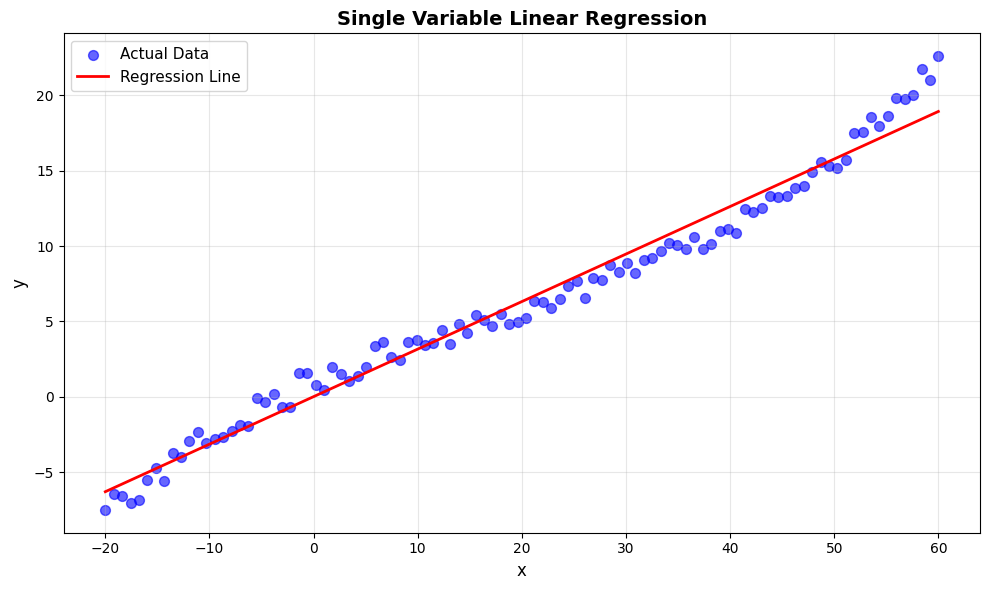

Model equation: y = 0.0065 + 0.3154·x


In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='blue', s=50, label='Actual Data')
plt.plot(x, h_fun(x, theta_0, theta_1), 'r-', linewidth=2, label='Regression Line')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Single Variable Linear Regression', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Model equation: y = {theta_0:.4f} + {theta_1:.4f}·x")


In [33]:
X = np.vstack([np.ones(x.shape), x])
y_matrix = y.copy()
y_matrix.shape = [1, -1]

print("MATRIX DIMENSIONS:")
print(f"X.shape = {X.shape}  <- (n+1, m) format")
print(f"y.shape = {y_matrix.shape}  <- (1, m) format")
print(f"\nFirst 5 columns of X (each column is one example):")
print(X[:, :5])


MATRIX DIMENSIONS:
X.shape = (2, 100)  <- (n+1, m) format
y.shape = (1, 100)  <- (1, m) format

First 5 columns of X (each column is one example):
[[  1.           1.           1.           1.           1.        ]
 [-20.         -19.19191933 -18.38383865 -17.57575798 -16.76767731]]


In [34]:
def h_fun_matrix(X, theta):

    return theta.T @ X


def calculate_cost_matrix(X, y, theta):

    m = X.shape[1]  # Number of examples
    predictions = h_fun_matrix(X, theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

print("✓ Matrix functions defined!")

✓ Matrix functions defined!


In [35]:
theta = np.array([[0.0], [0.0]])
alpha = 0.001
eps = 1e-5
prev_cost = float('inf')
iteration = 0
max_iterations = 10000

print("Initial theta shape:", theta.shape)
print("\n🔄 Starting Gradient Descent in matrix form...\n")

while True:
    iteration += 1

    predictions = h_fun_matrix(X, theta)
    h_y_diff = predictions - y_matrix

    m = X.shape[1]
    gradient = (h_y_diff @ X.T) / m

    theta = theta - alpha * gradient.T

    current_cost = calculate_cost_matrix(X, y_matrix, theta)

    if iteration % 1000 == 0:
        print(f"Iteration {iteration:5d}: J = {current_cost:.6f}")

    if abs(prev_cost - current_cost) < eps:
        print(f"\n✓ Convergence achieved! (Iteration: {iteration})")
        break

    if iteration >= max_iterations:
        print(f"\n⚠ Maximum iterations reached!")
        break

    prev_cost = current_cost

print("\n" + "=" * 60)
print("🎯 RESULTS (Matrix Form)")
print("=" * 60)
print(f"θ₀ = {theta[0, 0]:.6f}")
print(f"θ₁ = {theta[1, 0]:.6f}")
print(f"Final cost J = {current_cost:.6f}")
print("=" * 60)


Initial theta shape: (2, 1)

🔄 Starting Gradient Descent in matrix form...


✓ Convergence achieved! (Iteration: 4)

🎯 RESULTS (Matrix Form)
θ₀ = 0.006488
θ₁ = 0.315384
Final cost J = 0.639174


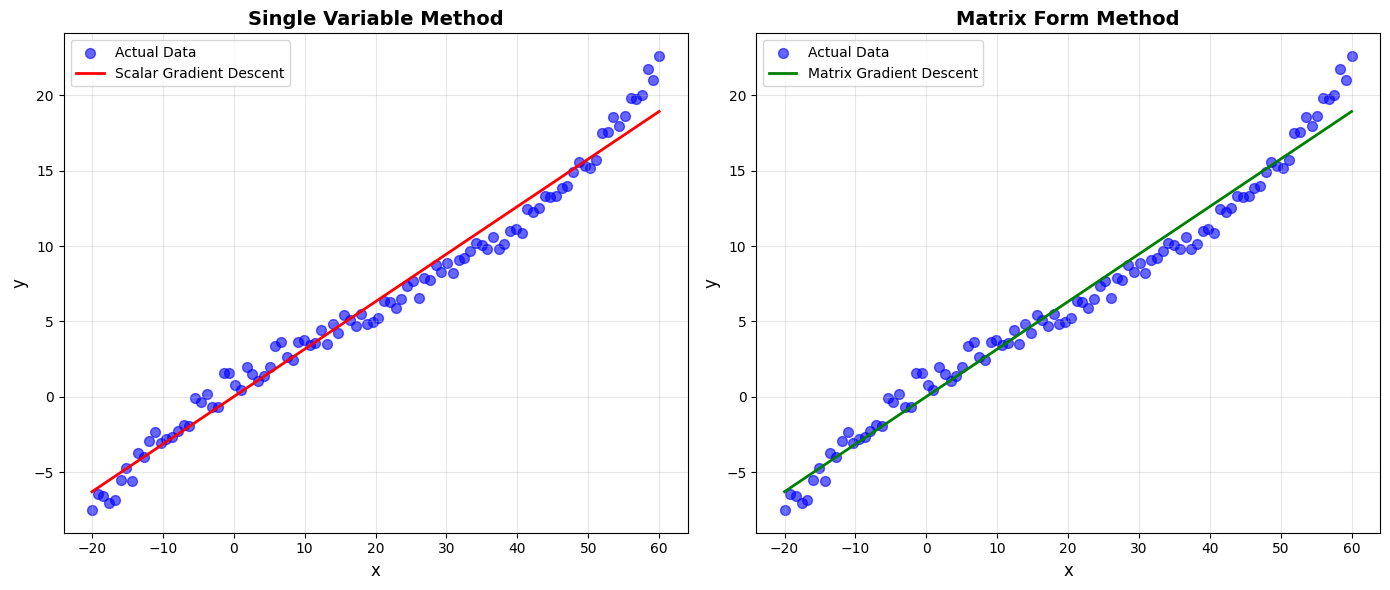

In [37]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.6, color='blue', s=50, label='Actual Data')
plt.plot(x, h_fun(x, theta_0, theta_1), 'r-', linewidth=2, label='Scalar Gradient Descent')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Single Variable Method', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.6, color='blue', s=50, label='Actual Data')
plt.plot(x, (theta.T @ X)[0], 'g-', linewidth=2, label='Matrix Gradient Descent')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Matrix Form Method', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [38]:
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)

print("HOUSING DATA INFORMATION:")
print(f"data2.shape = {data2.shape}")
print(f"\nFirst 5 rows (Area, Rooms, Price):")
print(data2[:5])

y_housing = data2[:, 2]
y_housing.shape = [1, y_housing.shape[0]]

X_housing = data2[:, 0:2]
X_housing = np.concatenate([np.ones((X_housing.shape[0], 1)), X_housing], axis=1).T

print(f"\n✓ Housing data loaded!")
print(f"  - Number of examples: {X_housing.shape[1]}")
print(f"  - Number of features: {X_housing.shape[0] - 1}")
print(f"  - X_housing.shape: {X_housing.shape}")
print(f"  - y_housing.shape: {y_housing.shape}")


HOUSING DATA INFORMATION:
data2.shape = (47, 3)

First 5 rows (Area, Rooms, Price):
[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]

✓ Housing data loaded!
  - Number of examples: 47
  - Number of features: 2
  - X_housing.shape: (3, 47)
  - y_housing.shape: (1, 47)



🏠 HOUSING DATA ANALYSIS
 Area (sqft) | Rooms |  Price ($)
------------------------------------------------------------
        2104 |     3 |     399900
        1600 |     3 |     329900
        2400 |     3 |     369000
        1416 |     2 |     232000
        3000 |     4 |     539900
        1985 |     4 |     299900
        1534 |     3 |     314900
        1427 |     3 |     198999
        1380 |     3 |     212000
        1494 |     3 |     242500

STATISTICS:
  Average area: 2001 sqft
  Area range: 852 - 4478 sqft
  Average rooms: 3.2
  Average price: $340,413
  Price range: $169,900 - $699,900


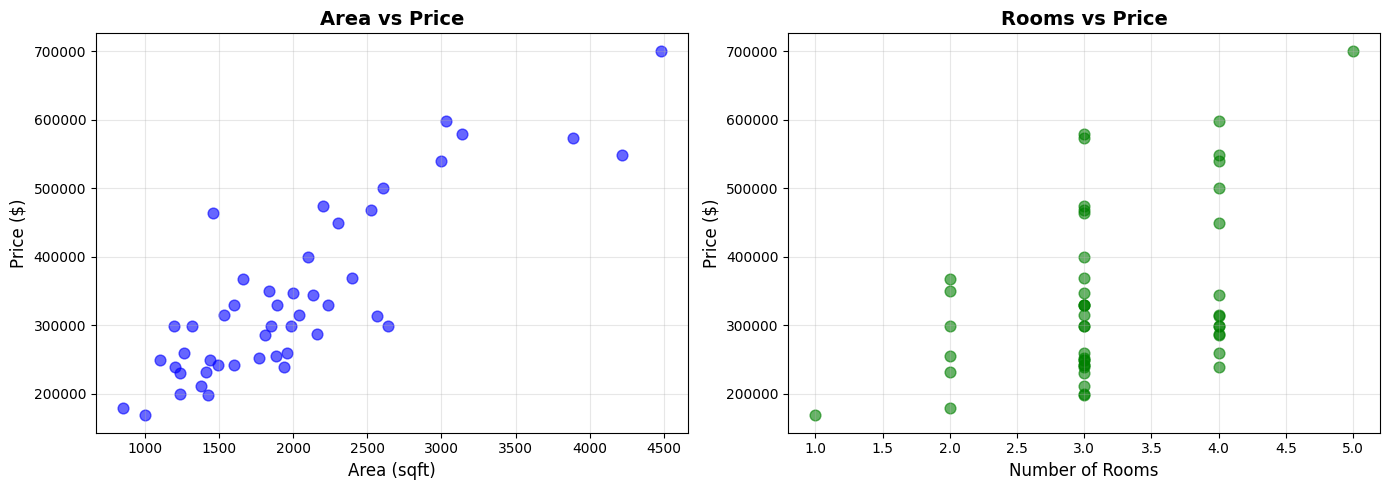

In [39]:
print("\n🏠 HOUSING DATA ANALYSIS")
print("=" * 60)
print(f"{'Area (sqft)':>12} | {'Rooms':>5} | {'Price ($)':>10}")
print("-" * 60)
for i in range(10):
    print(f"{X_housing[1, i]:>12.0f} | {X_housing[2, i]:>5.0f} | {y_housing[0, i]:>10.0f}")

print("\nSTATISTICS:")
print(f"  Average area: {X_housing[1, :].mean():.0f} sqft")
print(f"  Area range: {X_housing[1, :].min():.0f} - {X_housing[1, :].max():.0f} sqft")
print(f"  Average rooms: {X_housing[2, :].mean():.1f}")
print(f"  Average price: ${y_housing[0, :].mean():,.0f}")
print(f"  Price range: ${y_housing[0, :].min():,.0f} - ${y_housing[0, :].max():,.0f}")

fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X_housing[1, :], y_housing[0, :], alpha=0.6, color='blue', s=60)
ax1.set_xlabel('Area (sqft)', fontsize=12)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.set_title('Area vs Price', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_housing[2, :], y_housing[0, :], alpha=0.6, color='green', s=60)
ax2.set_xlabel('Number of Rooms', fontsize=12)
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.set_title('Rooms vs Price', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [40]:
y_scale = y_housing.max()
y_housing_scaled = y_housing / y_scale

X_scale = X_housing.max(axis=1)
X_scale.shape = [-1, 1]
X_housing_scaled = X_housing / X_scale

print("📏 FEATURE SCALING")
print("=" * 60)
print(f"y_scale = {y_scale:.0f}")
print(f"X_scale = {X_scale.flatten()}")
print(f"\nAfter scaling:")
print(f"  X_housing_scaled range: [{X_housing_scaled.min():.3f}, {X_housing_scaled.max():.3f}]")
print(f"  y_housing_scaled range: [{y_housing_scaled.min():.3f}, {y_housing_scaled.max():.3f}]")
print("\n✓ All values normalized to [0, 1] range!")

📏 FEATURE SCALING
y_scale = 699900
X_scale = [1.000e+00 4.478e+03 5.000e+00]

After scaling:
  X_housing_scaled range: [0.190, 1.000]
  y_housing_scaled range: [0.243, 1.000]

✓ All values normalized to [0, 1] range!


In [41]:
theta_housing = np.array([[0.0], [0.0], [0.0]])
alpha_housing = 0.01
eps_housing = 1e-7
prev_cost = float('inf')
iteration = 0
max_iterations = 10000

print("\n🔄 GRADIENT DESCENT FOR HOUSING PRICES")
print("=" * 60)
print(f"Hyperparameters:")
print(f"  - Learning rate (α): {alpha_housing}")
print(f"  - Convergence threshold (ε): {eps_housing}")
print(f"  - X_housing_scaled.shape: {X_housing_scaled.shape}")
print(f"  - theta_housing.shape: {theta_housing.shape}")
print(f"  - y_housing_scaled.shape: {y_housing_scaled.shape}")
print()

while True:
    iteration += 1

    predictions = h_fun_matrix(X_housing_scaled, theta_housing)
    h_y_diff = predictions - y_housing_scaled
    gradient = (h_y_diff @ X_housing_scaled.T) / X_housing_scaled.shape[1]

    theta_housing = theta_housing - alpha_housing * gradient.T

    current_cost = calculate_cost_matrix(X_housing_scaled, y_housing_scaled, theta_housing)

    if iteration % 500 == 0:
        print(f"Iteration {iteration:5d}: J = {current_cost:.8f}")

    if abs(prev_cost - current_cost) < eps_housing:
        print(f"\n✓ Convergence achieved! (Iteration: {iteration})")
        break

    if iteration >= max_iterations:
        print(f"\n⚠ Maximum iterations reached!")
        break

    prev_cost = current_cost

print("\n" + "=" * 60)
print("🎯 RESULTS (Housing Prices - Multivariate Regression)")
print("=" * 60)
print(f"θ₀ (intercept)          = {theta_housing[0, 0]:.6f}")
print(f"θ₁ (area coefficient)   = {theta_housing[1, 0]:.6f}")
print(f"θ₂ (rooms coefficient)  = {theta_housing[2, 0]:.6f}")
print(f"Final cost J            = {current_cost:.8f}")
print("=" * 60)



🔄 GRADIENT DESCENT FOR HOUSING PRICES
Hyperparameters:
  - Learning rate (α): 0.01
  - Convergence threshold (ε): 1e-07
  - X_housing_scaled.shape: (3, 47)
  - theta_housing.shape: (3, 1)
  - y_housing_scaled.shape: (1, 47)

Iteration   500: J = 0.00937746
Iteration  1000: J = 0.00832118
Iteration  1500: J = 0.00750034
Iteration  2000: J = 0.00685991
Iteration  2500: J = 0.00635799
Iteration  3000: J = 0.00596267
Iteration  3500: J = 0.00564961
Iteration  4000: J = 0.00540022
Iteration  4500: J = 0.00520030
Iteration  5000: J = 0.00503895
Iteration  5500: J = 0.00490782
Iteration  6000: J = 0.00480047
Iteration  6500: J = 0.00471196
Iteration  7000: J = 0.00463842
Iteration  7500: J = 0.00457690

✓ Convergence achieved! (Iteration: 7855)

🎯 RESULTS (Housing Prices - Multivariate Regression)
θ₀ (intercept)          = 0.098673
θ₁ (area coefficient)   = 0.713395
θ₂ (rooms coefficient)  = 0.109292
Final cost J            = 0.00453921


In [42]:
print("\n💰 PREDICTION EXAMPLES")
print("=" * 60)

example1 = np.array([[1], [1300], [4]])
h_example1 = (theta_housing.T @ (example1 / X_scale)) * y_scale
print(f"\nExample 1:")
print(f"  Area: {example1[1, 0]:.0f} sqft")
print(f"  Number of rooms: {example1[2, 0]:.0f}")
print(f"  Predicted price: ${h_example1[0, 0]:,.2f}")

example2 = np.array([[1], [2000], [3]])
h_example2 = (theta_housing.T @ (example2 / X_scale)) * y_scale
print(f"\nExample 2:")
print(f"  Area: {example2[1, 0]:.0f} sqft")
print(f"  Number of rooms: {example2[2, 0]:.0f}")
print(f"  Predicted price: ${h_example2[0, 0]:,.2f}")

example3 = np.array([[1], [3500], [5]])
h_example3 = (theta_housing.T @ (example3 / X_scale)) * y_scale
print(f"\nExample 3:")
print(f"  Area: {example3[1, 0]:.0f} sqft")
print(f"  Number of rooms: {example3[2, 0]:.0f}")
print(f"  Predicted price: ${h_example3[0, 0]:,.2f}")

print("=" * 60)



💰 PREDICTION EXAMPLES

Example 1:
  Area: 1300 sqft
  Number of rooms: 4
  Predicted price: $275,208.55

Example 2:
  Area: 2000 sqft
  Number of rooms: 3
  Predicted price: $337,961.16

Example 3:
  Area: 3500 sqft
  Number of rooms: 5
  Predicted price: $535,811.21


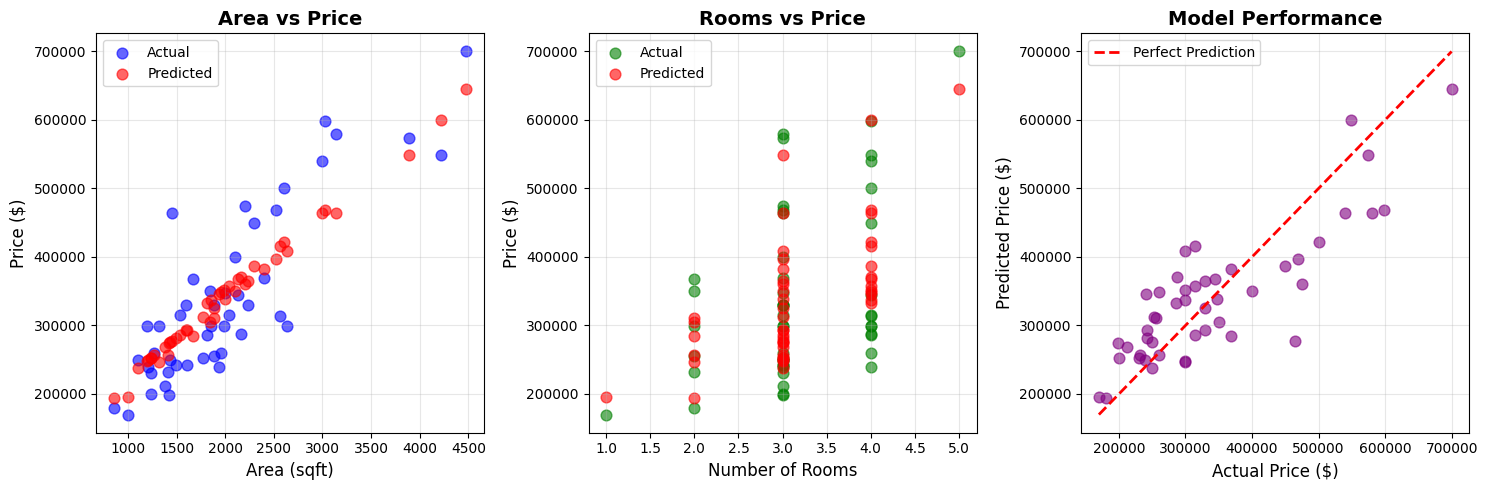


📊 MODEL PERFORMANCE METRICS
Mean Absolute Error (MAE):  $55,301.09
Root Mean Squared Error (RMSE): $66,686.99
Average price: $340,412.66
Error percentage: 16.25%


In [43]:
predictions_housing = (theta_housing.T @ X_housing_scaled) * y_scale

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(X_housing[1, :], y_housing[0, :], alpha=0.6, color='blue', s=60, label='Actual')
ax1.scatter(X_housing[1, :], predictions_housing[0, :], alpha=0.6, color='red', s=60, label='Predicted')
ax1.set_xlabel('Area (sqft)', fontsize=12)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.set_title('Area vs Price', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(X_housing[2, :], y_housing[0, :], alpha=0.6, color='green', s=60, label='Actual')
ax2.scatter(X_housing[2, :], predictions_housing[0, :], alpha=0.6, color='red', s=60, label='Predicted')
ax2.set_xlabel('Number of Rooms', fontsize=12)
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.set_title('Rooms vs Price', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(y_housing[0, :], predictions_housing[0, :], alpha=0.6, color='purple', s=60)
ax3.plot([y_housing.min(), y_housing.max()], [y_housing.min(), y_housing.max()],
         'r--', linewidth=2, label='Perfect Prediction')
ax3.set_xlabel('Actual Price ($)', fontsize=12)
ax3.set_ylabel('Predicted Price ($)', fontsize=12)
ax3.set_title('Model Performance', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

errors = predictions_housing[0, :] - y_housing[0, :]
mae = np.mean(np.abs(errors))
rmse = np.sqrt(np.mean(errors ** 2))

print("\n📊 MODEL PERFORMANCE METRICS")
print("=" * 60)
print(f"Mean Absolute Error (MAE):  ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"Average price: ${y_housing[0, :].mean():,.2f}")
print(f"Error percentage: {(mae / y_housing[0, :].mean()) * 100:.2f}%")
print("=" * 60)


In [44]:
X_poly = np.vstack([np.ones(x.shape), x, x**2, x**3])

print(f"\nPolynomial features created:")
print(f"  X_poly.shape = {X_poly.shape}")
print(f"  Rows: 1, x, x², x³")

X_scale_poly = X_poly.max(axis=1)
X_scale_poly.shape = [-1, 1]
X_poly_scaled = X_poly / X_scale_poly

y_poly = y.copy()
y_poly.shape = [1, -1]
y_scale_poly = y_poly.max()
y_poly_scaled = y_poly / y_scale_poly

print(f"\n📏 Scaling applied:")
print(f"  X_scale_poly = {X_scale_poly.flatten()}")
print(f"  y_scale_poly = {y_scale_poly:.2f}")

theta_poly = np.array([[0.0], [0.0], [0.0], [0.0]])
alpha_poly = 1e-3
eps_poly = 1e-10
prev_cost = float('inf')
iteration = 0
max_iterations = 10000

print(f"\n🔄 Starting Polynomial Gradient Descent...")
print(f"  X_poly_scaled.shape: {X_poly_scaled.shape}")
print(f"  theta_poly.shape: {theta_poly.shape}")
print(f"  y_poly_scaled.shape: {y_poly_scaled.shape}")
print()

while True:
    iteration += 1

    predictions = h_fun_matrix(X_poly_scaled, theta_poly)
    h_y_diff = predictions - y_poly_scaled
    gradient = (h_y_diff @ X_poly_scaled.T) / X_poly_scaled.shape[1]

    theta_poly = theta_poly - alpha_poly * gradient.T

    current_cost = calculate_cost_matrix(X_poly_scaled, y_poly_scaled, theta_poly)

    if iteration % 1000 == 0:
        print(f"Iteration {iteration:5d}: J = {current_cost:.10f}")

    if abs(prev_cost - current_cost) < eps_poly:
        print(f"\n✓ Convergence achieved! (Iteration: {iteration})")
        break

    if iteration >= max_iterations:
        print(f"\n⚠ Maximum iterations reached!")
        break

    prev_cost = current_cost

print("\n" + "=" * 60)
print("🎯 RESULTS (3rd Degree Polynomial Regression)")
print("=" * 60)
print(f"θ₀ (constant term) = {theta_poly[0, 0]:.8f}")
print(f"θ₁ (x coefficient) = {theta_poly[1, 0]:.8f}")
print(f"θ₂ (x² coefficient) = {theta_poly[2, 0]:.8f}")
print(f"θ₃ (x³ coefficient) = {theta_poly[3, 0]:.8f}")
print(f"Final cost J = {current_cost:.10f}")
print("=" * 60)



Polynomial features created:
  X_poly.shape = (4, 100)
  Rows: 1, x, x², x³

📏 Scaling applied:
  X_scale_poly = [1.00e+00 6.00e+01 3.60e+03 2.16e+05]
  y_scale_poly = 22.61

🔄 Starting Polynomial Gradient Descent...
  X_poly_scaled.shape: (4, 100)
  theta_poly.shape: (4, 1)
  y_poly_scaled.shape: (1, 100)

Iteration  1000: J = 0.0263104178
Iteration  2000: J = 0.0149629158
Iteration  3000: J = 0.0101595675
Iteration  4000: J = 0.0072841335
Iteration  5000: J = 0.0054582821
Iteration  6000: J = 0.0042842566
Iteration  7000: J = 0.0035225129
Iteration  8000: J = 0.0030223489
Iteration  9000: J = 0.0026884223
Iteration 10000: J = 0.0024603646

⚠ Maximum iterations reached!

🎯 RESULTS (3rd Degree Polynomial Regression)
θ₀ (constant term) = 0.02686292
θ₁ (x coefficient) = 0.43908797
θ₂ (x² coefficient) = 0.25019451
θ₃ (x³ coefficient) = 0.23629867
Final cost J = 0.0024603646


Text(0.5, 0, 'x')

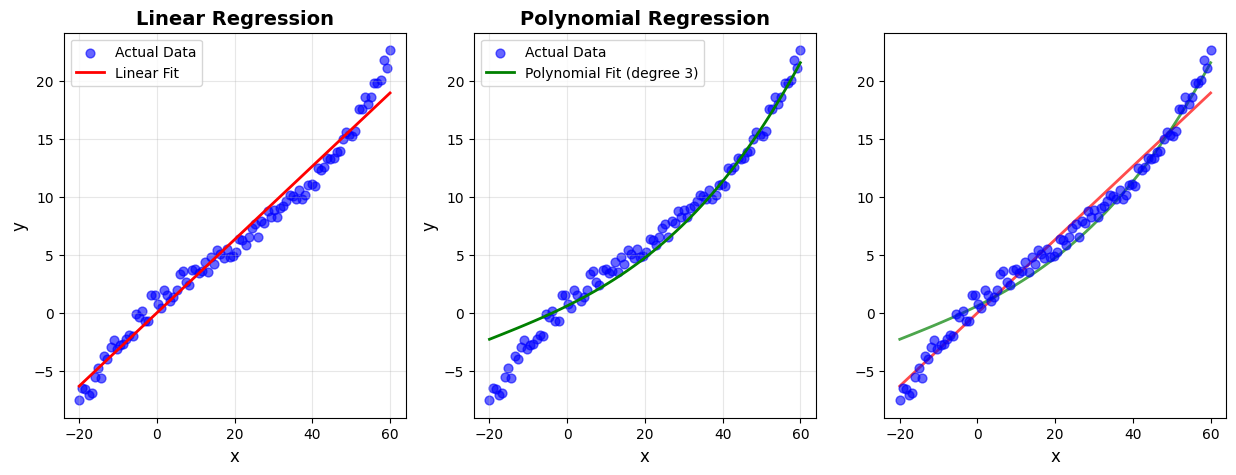

In [47]:
predictions_poly = (theta_poly.T @ X_poly_scaled) * y_scale_poly

# Create comparison plot
fig = plt.figure(figsize=(15, 5))

# Linear Regression
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(x, y, alpha=0.6, color='blue', s=40, label='Actual Data')
ax1.plot(x, h_fun(x, theta_0, theta_1), 'r-', linewidth=2, label='Linear Fit')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Linear Regression', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Polynomial Regression
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(x, y, alpha=0.6, color='blue', s=40, label='Actual Data')
# Sort for smooth curve plotting
sorted_indices = np.argsort(x)
ax2.plot(x[sorted_indices], predictions_poly[0, sorted_indices], 'g-', linewidth=2, label='Polynomial Fit (degree 3)')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('Polynomial Regression', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Side-by-side comparison
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(x, y, alpha=0.6, color='blue', s=40, label='Actual Data', zorder=3)
ax3.plot(x, h_fun(x, theta_0, theta_1), 'r-', linewidth=2, label='Linear', alpha=0.7)
ax3.plot(x[sorted_indices], predictions_poly[0, sorted_indices], 'g-', linewidth=2, label='Polynomial (deg 3)', alpha=0.7)
ax3.set_xlabel('x', fontsize=12)